In [1039]:
#!pip install plotly
#!conda install -c conda-forge jupyter_contrib_nbextensions

In [1040]:
import pandas as pd
import statistics as sta
import plotly.graph_objs as go
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
import numpy as np

In [1041]:
train_csv_path = "df_titanic/train.csv"
df_train = pd.read_csv(train_csv_path)

#test_csv_path = "df_titanic/test.csv"
#df_test = pd.read_csv(test_csv_path)


In [1042]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1043]:
#Entendimento dos dados

# Tratamento de dados

In [1044]:
df_train.groupby(['Sex', 'Pclass', 'Survived'],as_index = False).count()

,Sex,Pclass,Survived,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,female,1,0,3,3,3,3,3,3,3,3,3
1,female,1,1,91,91,82,91,91,91,91,78,89
2,female,2,0,6,6,6,6,6,6,6,1,6
3,female,2,1,70,70,68,70,70,70,70,9,70
4,female,3,0,72,72,55,72,72,72,72,2,72
5,female,3,1,72,72,47,72,72,72,72,4,72
6,male,1,0,77,77,61,77,77,77,77,56,77
7,male,1,1,45,45,40,45,45,45,45,39,45
8,male,2,0,91,91,84,91,91,91,91,2,91
9,male,2,1,17,17,15,17,17,17,17,4,17


In [1045]:
df_vazio = df_train[df_train['Age'].isnull()]

In [1046]:
df_vazio = df_vazio.groupby(['PassengerId', 'Sex'], as_index=False).count()

In [1047]:
df_vazio = df_vazio.groupby(['Sex'])['Age'].count().reset_index(name='Quantidade de idade vazia')

Text(0.5, 1.0, 'Quantidade de NAs nos registros')

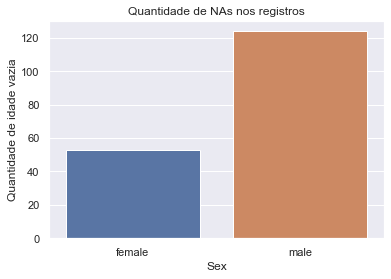

In [1048]:
sns.barplot(x='Sex', y='Quantidade de idade vazia', data=df_vazio).set_title('Quantidade de NAs nos registros')

In [1049]:
df_full = df_train[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age']].dropna().copy()

In [1050]:
df_full['Sex_d'] = df_full.Sex.map({'female':0, 'male':1})

In [1051]:
df_full = df_full.drop(columns={'Sex'}).rename(columns={'Sex_d':'Sex_Male'})


In [1052]:
#df_full = df_full.fillna(27)


In [1053]:
df_full[df_full['Age'].isnull()]

,PassengerId,Survived,Pclass,Age,Sex_Male


# Data Understanding

In [1054]:
df_age = df_train.groupby(['Sex', 'Pclass', 'Survived'], as_index = True)['PassengerId'].count()

In [1055]:
df_age = df_age.rename(columns={'PassengerId': 'Count'}, inplace=True)

In [1056]:
 df_age = df_age.reset_index(name='Count')

In [1057]:
df_female = df_age[df_age['Sex'] == 'female']

In [1058]:
df_female

,Sex,Pclass,Survived,Count
0,female,1,0,3
1,female,1,1,91
2,female,2,0,6
3,female,2,1,70
4,female,3,0,72
5,female,3,1,72


In [1059]:
df_male = df_age.reset_index()

Text(0.5, 1.0, 'Sobrevivência de Mulheres')

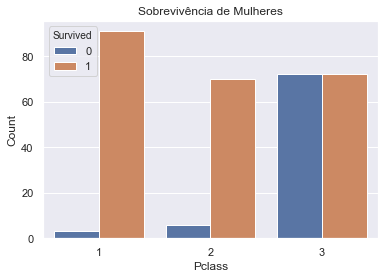

In [1060]:
sns.barplot(x = "Pclass", y = "Count", data = df_female, hue = "Survived").set_title('Sobrevivência de Mulheres')

Text(0.5, 1.0, 'Sobrevivência de Homens')

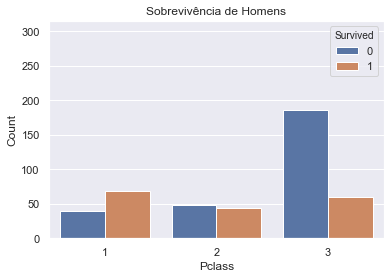

In [1061]:
sns.barplot(x = 'Pclass', y = 'Count', data = df_male, hue= 'Survived', errwidth=0).set_title('Sobrevivência de Homens')

# Faixa Etaria

In [1062]:
binn = []
for x in range(0, 90, 10):
    binn.append(x)
binn

[0, 10, 20, 30, 40, 50, 60, 70, 80]

In [1063]:
df_age = df_train.groupby(['Sex', 'Pclass', 'Survived', pd.cut(df_train['Age'], binn)], as_index = True)['Age'].count()

In [1064]:
#Para resetar o indice e nomear a coluna count
df_age = df_age.reset_index(name='count')

In [1065]:
df_age_f = df_age[df_age['Sex'] == 'female']

In [1066]:
df_age_f.head()

,Sex,Pclass,Survived,Age,count
0,female,1,0,"(0, 10]",1
1,female,1,0,"(20, 30]",1
2,female,1,0,"(40, 50]",1
3,female,1,1,"(10, 20]",13
4,female,1,1,"(20, 30]",20


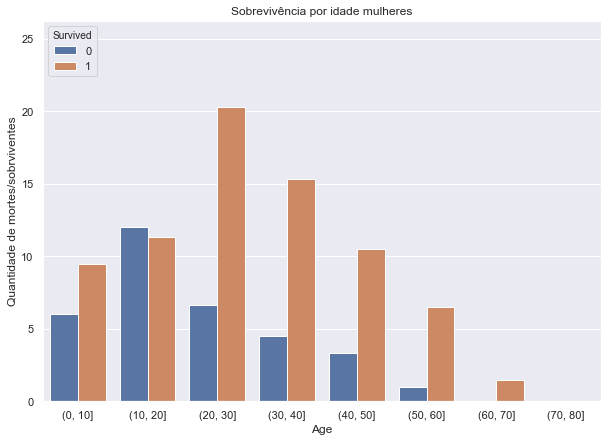

In [1067]:
f, ax = plt.subplots(figsize=(10,7))
sns.barplot(x='Age', y='count', data=df_age_f, hue='Survived', errwidth=0).set_title('Sobrevivência por idade mulheres')
plt.ylabel('Quantidade de mortes/sobrviventes')
plt.show()

In [1068]:
df_age_m = df_age[df_age['Sex'] == 'male']

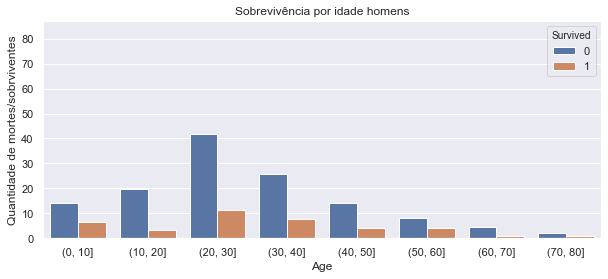

In [1069]:
f, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x='Age', y='count', data=df_age_m, hue='Survived', errwidth=0).set_title('Sobrevivência por idade homens')
plt.ylabel('Quantidade de mortes/sobrviventes')

plt.show()

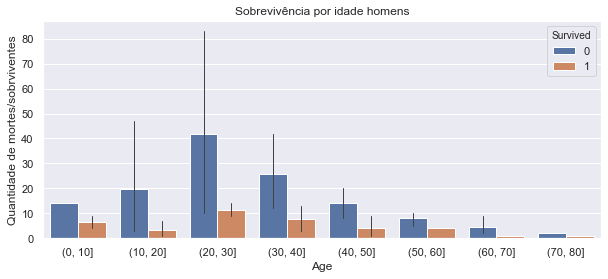

In [1070]:
f, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x='Age', y='count', data=df_age_m, hue='Survived', errwidth=1).set_title('Sobrevivência por idade homens')
plt.ylabel('Quantidade de mortes/sobrviventes')

plt.show()

In [1071]:
#Ver probabilidade das crianças sobreviverem,
#se somente recem nascido tem mais chance de sobreviver, 
#caso entrar idades nulas olhar Pclass para ver se encontra alguma coorelação
#df_name.head()

# Análise Diagnóstica

In [1072]:
df_child = df_full.copy()
df_child['LessThanFive'] = df_full.apply(lambda x : 1 if (x['Age'] < 5) else 0, axis = 1)

In [1073]:
df_child[df_child['Age'] < 5].head()

,PassengerId,Survived,Pclass,Age,Sex_Male,LessThanFive
7,8,0,3,2.0,1,1
10,11,1,3,4.0,0,1
16,17,0,3,2.0,1,1
43,44,1,2,3.0,0,1
63,64,0,3,4.0,1,1


In [1074]:
dict_tmp = {}
#Classe e Survived
df_tmp = df_child.copy()
df_tmp.drop(df_tmp[df_tmp.Age>12].index,inplace=True)
print('menores de 5:',
    '\nClasse 1 mortos:',str(df_tmp[(df_tmp.Survived==0) & (df_tmp.Pclass==1) & (df_tmp.LessThanFive==1)].shape[0]),
    '\nClasse 2 mortos:',str(df_tmp[(df_tmp.Survived==0) & (df_tmp.Pclass==2) & (df_tmp.LessThanFive==1)].shape[0]),
    '\nClasse 3 mortos:',str(df_tmp[(df_tmp.Survived==0) & (df_tmp.Pclass==3) & (df_tmp.LessThanFive==1)].shape[0]))
print('\n')
print('maiores de 5:',
    '\nClasse 1 mortos:',str(df_tmp[(df_tmp.Survived==0) & (df_tmp.Pclass==1) & (df_tmp.LessThanFive==0)].shape[0]),
    '\nClasse 2 mortos:',str(df_tmp[(df_tmp.Survived==0) & (df_tmp.Pclass==2) & (df_tmp.LessThanFive==0)].shape[0]),
    '\nClasse 3 mortos:',str(df_tmp[(df_tmp.Survived==0) & (df_tmp.Pclass==3) & (df_tmp.LessThanFive==0)].shape[0]))

menores de 5: 
Classe 1 mortos: 1 
Classe 2 mortos: 0 
Classe 3 mortos: 12


maiores de 5: 
Classe 1 mortos: 0 
Classe 2 mortos: 0 
Classe 3 mortos: 16


In [1075]:
df_tmp.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'Sex_Male', 'LessThanFive'], dtype='object')

In [1076]:
#Mulheres sobreviventes e não sobreviventes
mask = (df_tmp.Sex_Male==0) & (df_tmp.LessThanFive==0)
print(
    'Meninas mais velhas mortas:',str(df_tmp[(df_tmp.Survived==0) & mask].shape[0]),
    '\nMeninas mais velhas sobreviventes:',str(df_tmp[(df_tmp.Survived==1) & mask].shape[0]))
#Mulheres sobreviventes e não sobreviventes
mask = (df_tmp.Sex_Male==0) & (df_tmp.LessThanFive==1)
print(
    'Meninas mais novas mortas:',str(df_tmp[(df_tmp.Survived==0) & mask].shape[0]),
    '\nMeninas mais novas sobreviventes:',str(df_tmp[(df_tmp.Survived==1) & mask].shape[0]))

Meninas mais velhas mortas: 8 
Meninas mais velhas sobreviventes: 7
Meninas mais novas mortas: 5 
Meninas mais novas sobreviventes: 12


In [1077]:
dict_tmp = {'Age': ['0-5', '6-12']}


In [1078]:
#Mulheres sobreviventes e não sobreviventes
#mulheres sobreviventes

mask = (df_tmp.Survived == 1) & (df_tmp.Sex_Male == 0)
dict_tmp.update({'Meninas Sobreviventes': [df_tmp[(mask) & (df_tmp.LessThanFive == 1)].shape[0], 
                                       df_tmp[(mask) & (df_tmp.LessThanFive == 0)].shape[0]]})
#mulheres nao sobreviventes
mask = (df_tmp.Survived == 0) & (df_tmp.Sex_Male == 0)
dict_tmp.update({'Meninas nao Sobreviventes': [df_tmp[(mask) & (df_tmp.LessThanFive == 1)].shape[0],
                                           df_tmp[(mask) & (df_tmp.LessThanFive == 0)].shape[0]]})


In [1079]:
#Homens sobreviventes e não sobreviventes
mask = (df_tmp.Sex_Male==1) & (df_tmp.LessThanFive==0)
print(
    'Meninos mais velhos mortos:',str(df_tmp[(df_tmp.Survived==0) & mask].shape[0]),
    '\nMeninos mais velhos sobreviventes:',str(df_tmp[(df_tmp.Survived==1) & mask].shape[0]))
mask = (df_tmp.Sex_Male==1) & (df_tmp.LessThanFive==1)
print(
    'Meninos mais novos mortos:',str(df_tmp[(df_tmp.Survived==0) & mask].shape[0]),
    '\nMeninos mais novos sobreviventes:',str(df_tmp[(df_tmp.Survived==1) & mask].shape[0]))

Meninos mais velhos mortos: 8 
Meninos mais velhos sobreviventes: 6
Meninos mais novos mortos: 8 
Meninos mais novos sobreviventes: 15


In [1080]:
#Meninos sobreviventes e não sobreviventes
#Meninos sobreviventes
mask = (df_tmp.Survived == 1) & (df_tmp.Sex_Male == 1)
dict_tmp.update({'Meninos Sobreviventes': [df_tmp[(mask) & (df_tmp.LessThanFive == 1)].shape[0], 
                                       df_tmp[(mask) & (df_tmp.LessThanFive == 0)].shape[0]]})
#mulheres nao sobreviventes
mask = (df_tmp.Survived == 0) & (df_tmp.Sex_Male == 1)
dict_tmp.update({'Meninos nao Sobreviventes': [df_tmp[(mask) & (df_tmp.LessThanFive == 1)].shape[0],
                                           df_tmp[(mask) & (df_tmp.LessThanFive == 0)].shape[0]]})


In [1081]:
#sobreviventes e não sobreviventes
dict_tmp.update({'Total de sobreviventes':[df_tmp[(df_tmp.Survived == 1) & (df_tmp.LessThanFive == 1)].shape[0],
                                      df_tmp[(df_tmp.Survived == 1) & (df_tmp.LessThanFive == 0)].shape[0]]})

dict_tmp.update({'Total de não sobreviventes':[df_tmp[(df_tmp.Survived == 0) & (df_tmp.LessThanFive == 1)].shape[0],
                                      df_tmp[(df_tmp.Survived == 0) & (df_tmp.LessThanFive == 0)].shape[0]]})


In [1082]:
#Porcentagem dos sobreviventes Menores que 5 anos
dict_tmp.update({'% sobreviventes':[(df_tmp[(df_tmp.LessThanFive == 1) & (df_tmp.Survived == 1)].shape[0] / df_tmp[df_tmp.Survived == 1].shape[0]) * 100,
                                                 (df_tmp[(df_tmp.LessThanFive == 0) & (df_tmp.Survived == 1)].shape[0] / df_tmp[df_tmp.Survived == 1].shape[0]) * 100]})




In [1083]:
#Homens Sobreviventes
mask = (df_tmp.Sex_Male==1) & (df_tmp.LessThanFive==0)
print(
    'Meninos não sobreviventes:',str(df_tmp[(df_tmp.Survived==0) & mask].shape[0]),
    '\nMeninas mais velhas sobreviventes:',str(df_tmp[(df_tmp.Survived==1) & mask].shape[0]))

Meninos não sobreviventes: 8 
Meninas mais velhas sobreviventes: 6


In [1084]:
#Homens não sobreviventes
mask2 = (df_full.Survived==0) & (df_full.Sex_Male == 1)
df_full[mask2].shape[0]

360

In [1085]:
#Porcentagem dos Sobrviventes Menores que 5 anos pertencentes à classe 1
dict_tmp.update({'% Sobreviventes classe 1: ':[(df_tmp[(df_tmp.LessThanFive==1) & (df_tmp.Survived==1) & (df_tmp.Pclass == 1)].shape[0] / df_tmp[df_tmp.Survived == 1].shape[0]) * 100,
                                                                           (df_tmp[(df_tmp.LessThanFive==0) & (df_tmp.Survived==1) & (df_tmp.Pclass == 1)].shape[0] / df_tmp[df_tmp.Survived == 1].shape[0]) * 100]})



In [1086]:
dict_tmp.update({'% Sobreviventes Classe 2:':[(df_tmp[(df_tmp.LessThanFive==1) & (df_tmp.Survived==1) & (df_tmp.Pclass == 2)].shape[0] / df_tmp[df_tmp.Survived == 1].shape[0])*100,
                                                                           (df_tmp[(df_tmp.LessThanFive==0) & (df_tmp.Survived==1) & (df_tmp.Pclass == 2)].shape[0] / df_tmp[df_tmp.Survived == 1].shape[0])*100]})


In [1087]:
dict_tmp.update({'% Sobreviventes Classe 3:':[(df_tmp[(df_tmp.LessThanFive==1) & (df_tmp.Survived==1) & (df_tmp.Pclass == 3)].shape[0] / df_tmp[df_tmp.Survived == 1].shape[0])*100,
                                                                           (df_tmp[(df_tmp.LessThanFive==0) & (df_tmp.Survived==1) & (df_tmp.Pclass == 3)].shape[0] / df_tmp[df_tmp.Survived == 1].shape[0])*100]})


In [1088]:
df_child = pd.DataFrame(dict_tmp)

In [1089]:
df_child = df_child.set_index('Age')

In [1090]:
df_teste = df_child.reset_index()

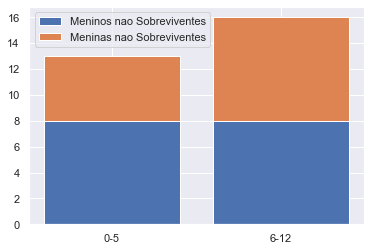

In [1091]:
pl3 = plt.bar(df_teste['Age'], df_teste['Meninos nao Sobreviventes'])
pl4 = plt.bar(df_teste['Age'], df_teste['Meninas nao Sobreviventes'], bottom = df_teste['Meninos nao Sobreviventes'])
plt.legend((pl3[0], pl4[0]), ('Meninos nao Sobreviventes', 'Meninas nao Sobreviventes'))
plt.show()

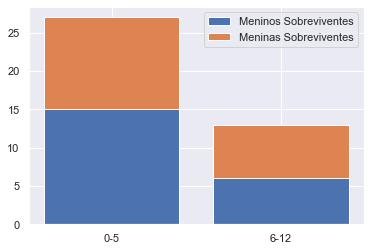

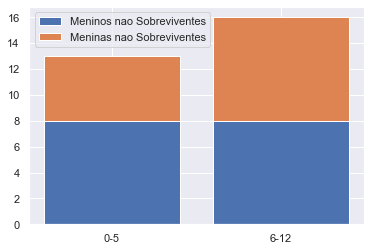

In [1092]:
pl1 = plt.bar(df_teste['Age'], df_teste['Meninos Sobreviventes'])
pl2 = plt.bar(df_teste['Age'], df_teste['Meninas Sobreviventes'], bottom = df_teste['Meninos Sobreviventes'])
plt.legend((pl1[0], pl2[0]), ('Meninos Sobreviventes', 'Meninas Sobreviventes'))
plt.show()
pl3 = plt.bar(df_teste['Age'], df_teste['Meninos nao Sobreviventes'])
pl4 = plt.bar(df_teste['Age'], df_teste['Meninas nao Sobreviventes'], bottom = df_teste['Meninos nao Sobreviventes'])
plt.legend((pl3[0], pl4[0]), ('Meninos nao Sobreviventes', 'Meninas nao Sobreviventes'))
plt.show()

In [1093]:
df_child.head()

,Meninas Sobreviventes,Meninas nao Sobreviventes,Meninos Sobreviventes,Meninos nao Sobreviventes,Total de sobreviventes,Total de não sobreviventes,% sobreviventes,% Sobreviventes classe 1:,% Sobreviventes Classe 2:,% Sobreviventes Classe 3:
Age,,,,,,,,,,
0-5,12,5,15,8,27,13,67.5,5.0,30.0,32.5
6-12,7,8,6,8,13,16,32.5,2.5,12.5,17.5


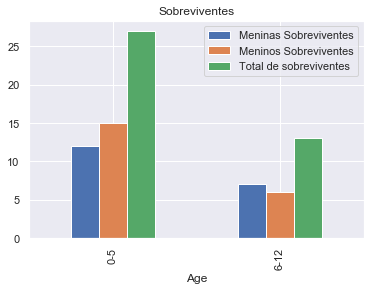

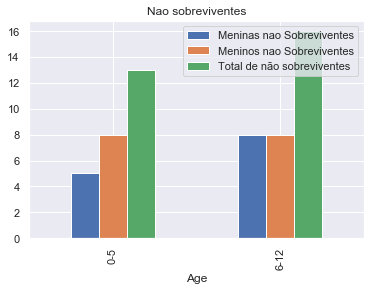

In [1094]:
df_child[['Meninas Sobreviventes', 'Meninos Sobreviventes', 'Total de sobreviventes']].plot(kind='bar', title='Sobreviventes')
df_child[['Meninas nao Sobreviventes', 'Meninos nao Sobreviventes', 'Total de não sobreviventes']].plot(kind='bar', title='Nao sobreviventes')

In [1095]:
df_full

,PassengerId,Survived,Pclass,Age,Sex_Male
0,1,0,3,22.0,1
1,2,1,1,38.0,0
2,3,1,3,26.0,0
3,4,1,1,35.0,0
4,5,0,3,35.0,1
...,...,...,...,...,...
885,886,0,3,39.0,0
886,887,0,2,27.0,1
887,888,1,1,19.0,0
889,890,1,1,26.0,1


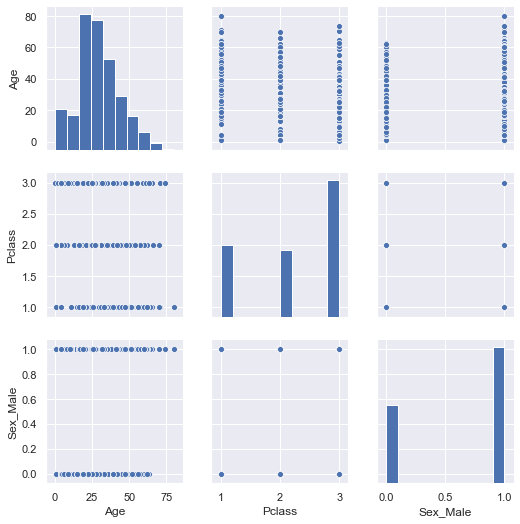

In [1096]:
sns.set(context='notebook', style='darkgrid')
sns.pairplot(df_full[['Age', 'Pclass', 'Sex_Male']], height=2.5)
plt.show()

# Correlation Grapich

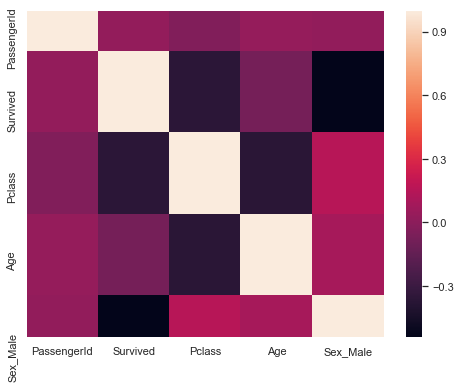

In [1097]:
correlation = df_full.corr()
correlation['Age'].sort_values(ascending = False).head(15)

f, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(correlation)
plt.show()

# Machine Learning

In [1098]:
from sklearn.model_selection import train_test_split

# Regressão Linear Logistica

In [1099]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1100]:
df_full.head()

,PassengerId,Survived,Pclass,Age,Sex_Male
0,1,0,3,22.0,1
1,2,1,1,38.0,0
2,3,1,3,26.0,0
3,4,1,1,35.0,0
4,5,0,3,35.0,1


In [1101]:
X_train, X_test, y_train, y_test = train_test_split(df_full[['Pclass', 'Sex_Male', 'Age']], df_full.Survived, train_size = 0.7, random_state=1)

In [1102]:
from sklearn.linear_model import LogisticRegression

In [1103]:
model = LogisticRegression()

In [1104]:
model.fit(X_train, y_train)

C:\Users\BrunoDefantedaSilva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [1105]:
yhat = model.predict(X_test)

In [1106]:
y_hat_prob = model.predict_proba(X_test)[:, 1]

(array([60., 26., 22., 17., 12., 13., 13., 12., 15., 25.]),
 array([0.05780116, 0.14326347, 0.22872578, 0.31418808, 0.39965039,
        0.4851127 , 0.57057501, 0.65603732, 0.74149963, 0.82696194,
        0.91242425]),
 <a list of 10 Patch objects>)

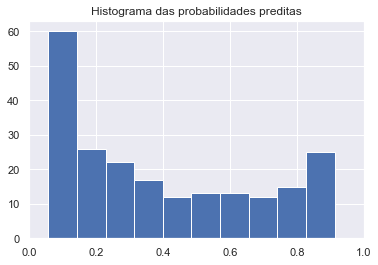

In [1107]:
plt.title('Histograma das probabilidades preditas')
plt.xlim(0, 1)
plt.hist(y_hat_prob, bins=10)

# Metrics

In [1108]:
yhat

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [1109]:
#y_test['Pred'] = yhat

In [1110]:
#y_test.pop('Pred')

In [1111]:
#y_test = pd.DataFrame(y_test)

In [1112]:
#y_test['Pred'] = yhat

In [1113]:
#y_test

In [1114]:
#Accuracy Metric. It's the proportion of true values among of the total numbers of the classes examined.
ac_logistic = accuracy_score(y_test, yhat)
ac_logistic

0.7767441860465116

In [1115]:
#Precision Metric. It's the proportion of true values that are really true
precision_score(y_test, yhat)

0.7142857142857143

In [1116]:
#Recall_score. It's how many true positives were recalled (found) and how many of the correct hits were also found 
recall_score(y_test, yhat)

0.6790123456790124

In [1117]:
#F1_Score Metric. It's a number between 0 and 1. It's a hamonic mean of Precision and Recall Metrics
f1_score(y_test, yhat)

0.6962025316455697

In [1118]:
#Criando a comparacao

In [1119]:
yhat2 = pd.DataFrame(yhat).rename(columns = {0:'Predito'})

In [1120]:
yhat2 = yhat2.set_index(y_test.index)

In [1121]:
y_test2 = pd.DataFrame(y_test)

In [1122]:
y_test2['Predito'] = yhat2['Predito']

In [1123]:
pd.options.display.max_rows = 60

In [1124]:
y_test2

,Survived,Predito
689,1,1
278,0,0
506,1,1
9,1,1
494,0,0
...,...,...
333,0,0
383,1,1
396,0,1
279,1,1


# Confusion Matrix - Logistic Regression

[]

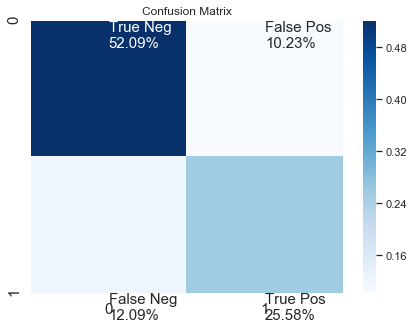

In [1125]:
fig = plt.figure(figsize=(7,5))
cm = confusion_matrix(y_test, yhat)
kws = {"ha": 'left',"va": 'top', "size":15}
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
heatmap = sns.heatmap(cm/np.sum(cm), annot=labels, annot_kws=kws, fmt='', cmap='Blues').set_title('Confusion Matrix')
plt.tick_params(labelsize=15)
plt.plot()

# ROC CURVE AUC - Logistic Regression

In [1126]:
fpr, tpr, threshold = roc_curve(y_test, y_hat_prob)

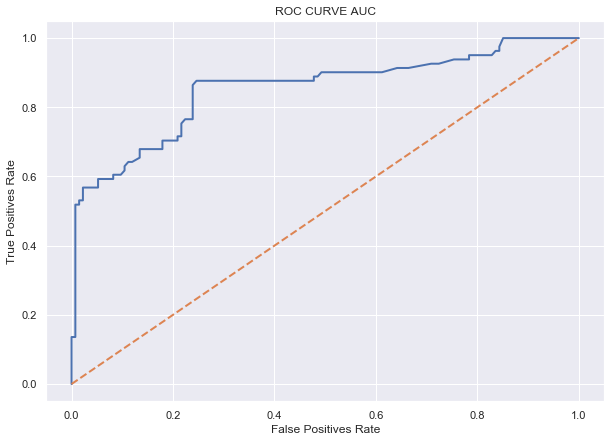

In [1127]:
plt.figure(figsize=(10, 7))
plt.title('ROC CURVE AUC')
plt.xlabel('False Positives Rate')
plt.ylabel('True Positives Rate')
plt.plot(fpr, tpr, lw=2)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.show()

# Árvore de decisão

In [1128]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [1129]:
df_full[['Pclass', 'Age', 'Sex_Male']].head()

,Pclass,Age,Sex_Male
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1


In [1130]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_full[['Pclass', 'Age', 'Sex_Male']], df_full.Survived, train_size=0.75, random_state=1)

In [1131]:
model_tree = DecisionTreeClassifier()

In [1132]:
model_tree.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1133]:
df_full

,PassengerId,Survived,Pclass,Age,Sex_Male
0,1,0,3,22.0,1
1,2,1,1,38.0,0
2,3,1,3,26.0,0
3,4,1,1,35.0,0
4,5,0,3,35.0,1
...,...,...,...,...,...
885,886,0,3,39.0,0
886,887,0,2,27.0,1
887,888,1,1,19.0,0
889,890,1,1,26.0,1


In [1134]:
yhat = model_tree.predict(X_test2)

In [1135]:
y_hat_prob = model_tree.predict_proba(X_test2)[:, 1]

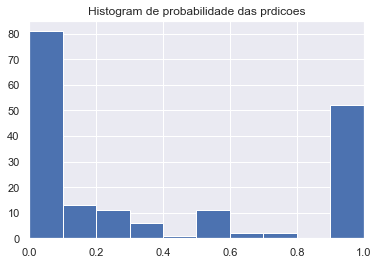

In [1136]:
plt.hist(y_hat_prob, bins=10)
plt.xlim(0, 1)
plt.title('Histogram de probabilidade das prdicoes')
plt.show()

# Metrics

In [1137]:
#Accuracy Metric. It's the proportion of true values among of the total numbers of the classes examined.
ac_tree = accuracy_score(y_test2, yhat)
ac_tree

0.8547486033519553

In [1138]:
#Precision Metric. It's the proportion of true values that are really true
precision_score(y_test2, yhat)

0.8596491228070176

In [1139]:
#Recall_score. It's how many true positives were recalled (found) and how many of the correct hits were also found 
recall_score(y_test2, yhat)

0.7313432835820896

In [1140]:
#F1_Score Metric. It's a number between 0 and 1. It's a hamonic mean of Precision and Recall Metrics
f1_score(y_test2, yhat)

0.7903225806451613

# Confusion Matrix - Tree Decision

[]

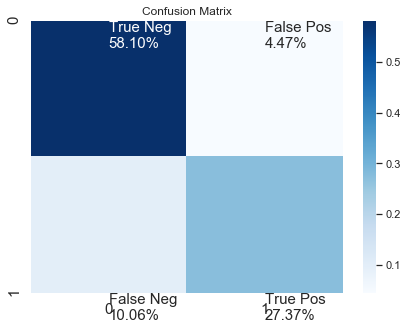

In [1141]:
fig = plt.figure(figsize=(7,5))
cm = confusion_matrix(y_test2, yhat)
kws = {"ha": 'left',"va": 'top', "size":15}
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
heatmap = sns.heatmap(cm/np.sum(cm), annot=labels, annot_kws=kws, fmt='', cmap='Blues').set_title('Confusion Matrix')
plt.tick_params(labelsize=15)
plt.plot()

# ROC Curve AUC - Decision Tree

In [1142]:
fpr, tpr, threshold = roc_curve(y_test2, y_hat_prob)

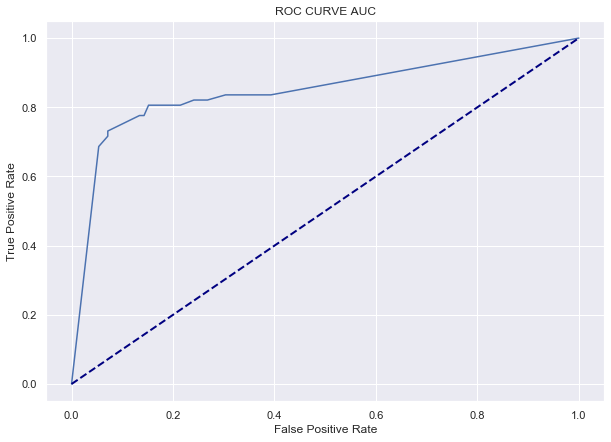

In [1143]:
plt.figure(figsize=(10, 7))
plt.title('ROC CURVE AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

In [1144]:
#pd.options.display.max_rows = 60

In [1145]:
#df_full.head()

In [1146]:
yhat = pd.DataFrame(yhat).rename(columns = {0:'Predito'})

In [1147]:
yhat = yhat.set_index(y_test2.index)

In [1148]:
y_test2 = pd.DataFrame(y_test2)
y_test2['Predito'] = yhat['Predito']

In [1149]:
#That's a comparation between the True values and the Predicted values
y_test2

,Survived,Predito
689,1,1
278,0,0
506,1,1
9,1,1
494,0,0
...,...,...
322,1,1
597,0,0
436,0,0
257,1,1


# Random Forest Classification

In [1150]:
X_train, X_test, y_train, y_test = train_test_split(df_full[['Pclass', 'Age', 'Sex_Male']], df_full.Survived, train_size=0.7, random_state=1)

In [1151]:
model = RandomForestClassifier()

In [1152]:
model.fit(X_train, y_train)

C:\Users\BrunoDefantedaSilva\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1153]:
yhat = model.predict(X_test)
yhat

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [1154]:
y_hat_prob = model.predict_proba(X_test)[:,1]

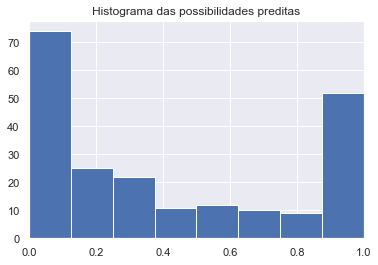

In [1155]:
plt.hist(y_hat_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histograma das possibilidades preditas')
plt.show()

# Metrics

In [1157]:
#Cross Validate Metric
cv_validate = cross_validate(model, df_full[['Pclass', 'Age', 'Sex_Male']], df_full.Survived, cv=5)
cv_validate['test_score'].mean()

0.8123313306411898

In [868]:
ac_random = accuracy_score(y_test, yhat)
ac_random

0.827906976744186

In [869]:
precision_score(y_test, yhat)

0.7682926829268293

In [870]:
recall_score(y_test, yhat)

0.7777777777777778

In [871]:
f1_score(y_test, yhat)

0.773006134969325

# Confusion Matrix - Random Forest

[]

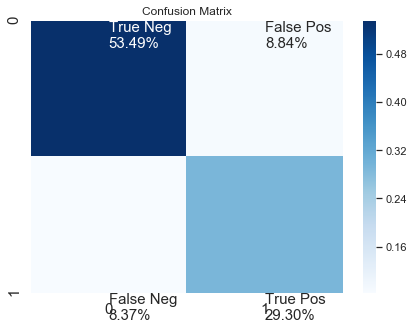

In [872]:
fig = plt.figure(figsize=(7,5))
cm = confusion_matrix(y_test, yhat)

kws = {"ha": 'left',"va": 'top', "size":15}
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
heatmap = sns.heatmap(cm/np.sum(cm), annot=labels, annot_kws=kws, fmt='', cmap='Blues').set_title('Confusion Matrix')
plt.tick_params(labelsize=15)
plt.plot()

# ROC CURVE AUC - Random Forest

In [873]:
fpr, tpr, threshold = roc_curve(y_test, y_hat_prob)

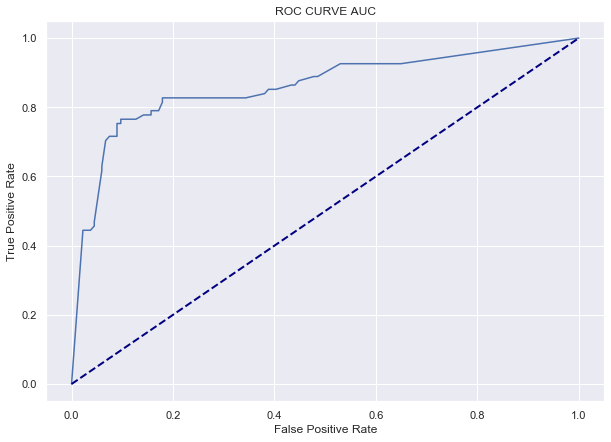

In [874]:
plt.figure(figsize=(10,7))
plt.title('ROC CURVE AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

# Final Result of the Machine Learning Algorithms

In [875]:
Columns = [
    'Algorithm',
    'Percent of Accuracy'
]

df_metrics = pd.DataFrame({"Algorithm": ['Logistic Regression', 'Tree Decision', 'Random Forest'], 
                           "Percent of Accuracy": [ac_logistic * 100, ac_tree * 100, ac_random * 100]})
df_metrics.head()

,Algorithm,Percent of Accuracy
0,Logistic Regression,77.674419
1,Tree Decision,85.474860
2,Random Forest,82.790698


In [876]:
df_metrics.sort_values(['Percent of Accuracy'], ascending=False, inplace=True)

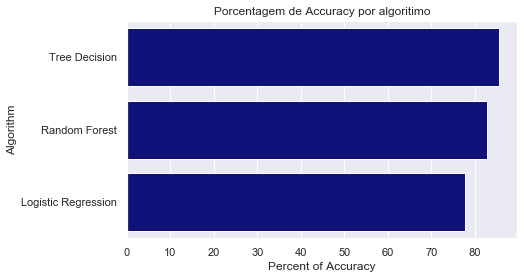

In [877]:
f, ax = plt.subplots(figsize=(7,4))

total = len(df_metrics['Percent of Accuracy'])
barplot = sns.barplot(x='Percent of Accuracy', y='Algorithm', data=df_metrics, color='darkblue')
plt.title('Porcentagem de Accuracy por algoritimo')

plt.show()